### 01. Library 호출

In [1]:
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt

In [2]:
#학습과 테스트 모델 분리
from sklearn.model_selection import train_test_split

In [6]:
#ARIMA, STATIONARY 학습 및 분석을 위한 Library
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# from statsmodels.tsa.arima_model import ARIMA    #old번전
from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.statespace.sarimax import SARIMAX    #auto_arima로 대체
from pmdarima.arima import auto_arima

import itertools    #배열 경우의 수 만큼 병합

In [7]:
## 데이터 Read  10년치 경제심리 지수
raw_df = pd.read_csv('./513Y001.csv', encoding='CP949')

In [9]:
raw_df.head(5)

,Unnamed: 0,STAT_CODE,STAT_NAME,ITEM_CODE1,ITEM_NAME1,ITEM_CODE2,ITEM_NAME2,ITEM_CODE3,ITEM_NAME3,ITEM_CODE4,ITEM_NAME4,UNIT_NAME,TIME,DATA_VALUE
0,0,513Y001,6.3. 경제심리지수,E1000,경제심리지수(원계열),NaN,NaN,NaN,NaN,NaN,NaN,NaN,201301,94.5
1,1,513Y001,6.3. 경제심리지수,E1000,경제심리지수(원계열),NaN,NaN,NaN,NaN,NaN,NaN,NaN,201302,96.3
2,2,513Y001,6.3. 경제심리지수,E1000,경제심리지수(원계열),NaN,NaN,NaN,NaN,NaN,NaN,NaN,201303,98.3
3,3,513Y001,6.3. 경제심리지수,E1000,경제심리지수(원계열),NaN,NaN,NaN,NaN,NaN,NaN,NaN,201304,97.9
4,4,513Y001,6.3. 경제심리지수,E1000,경제심리지수(원계열),NaN,NaN,NaN,NaN,NaN,NaN,NaN,201305,97.3


In [10]:
data = raw_df[['TIME', 'DATA_VALUE']]    #필요컬럼만 추출

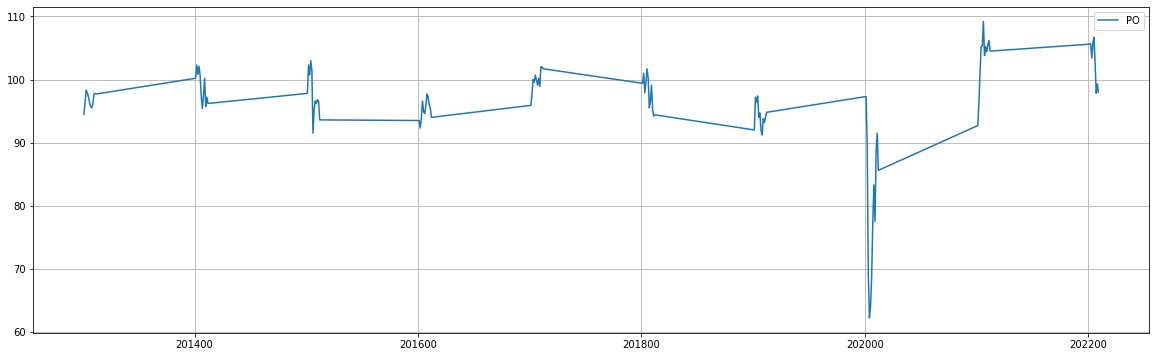

In [12]:
plt.figure(figsize=(20,6))
plt.plot(data['TIME'], data['DATA_VALUE'], label='PO')
plt.grid()
plt.legend(loc='best')

plt.show()

### 02. 데이터 추세 분해

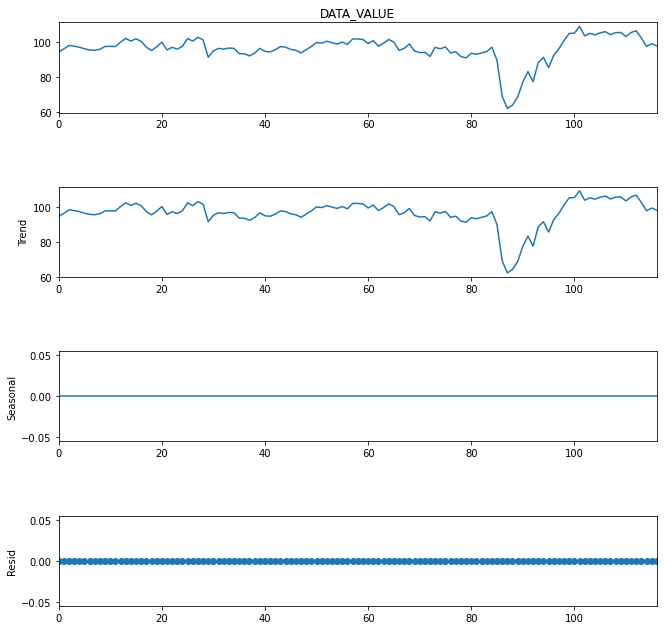

In [13]:
decomposion = sm.tsa.seasonal_decompose(data['DATA_VALUE'], model='additive', period=1)
fig = decomposion.plot()
fig.set_size_inches(10, 10)
plt.show()

### 03. 시계열 데이터 Stationary (정상성) 분석

###     시간에 따라 평균이나 분산이 일정한지 파악 

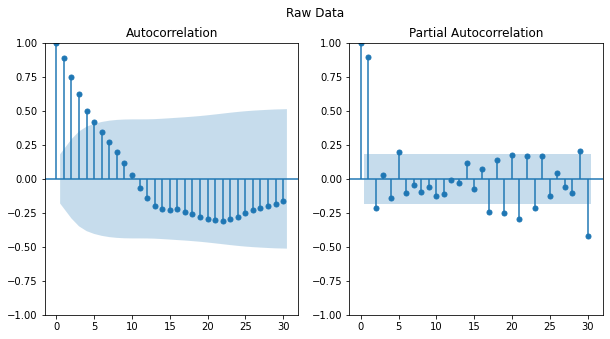

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(data['DATA_VALUE'].values.squeeze(), lags=30, ax=ax[0]);
sm.graphics.tsa.plot_pacf(data['DATA_VALUE'].values.squeeze(), lags=30, ax=ax[1]);

In [17]:
result = adfuller(data['DATA_VALUE'])
format(result[1], '.23f')

'0.03170639966400138481939'

## 0.05 이하 이므로 정상성이 있다, 즉 정상적인 시계열 데이터 라고 판단

### 04. 만약 0.05 이상의 비정상성 데이터의 경우 차분(Differencing) 처리

In [18]:
# 학습(0.8)과 테스트(0.2) 데이터 분리
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

In [25]:
diff_train_data = train_data.copy()

In [26]:
#1차 차분
diff_train_data = diff_train_data['DATA_VALUE'].diff()

In [27]:
diff_train_data.head(5)

0    NaN
1    1.8
2    2.0
3   -0.4
4   -0.6
Name: DATA_VALUE, dtype: float64

In [28]:
diff_train_data = diff_train_data.dropna()    #누락데이터(NaN) 제거

### 차분 이 후 정상성 파악

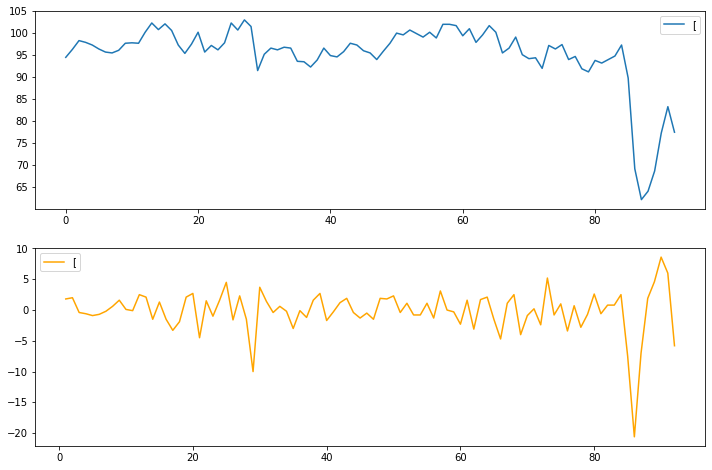

In [30]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(train_data['DATA_VALUE'])
plt.legend('[Raw Data (Nonstationary)]')

plt.subplot(212)
plt.plot(diff_train_data, 'orange')
plt.legend('[Diff Raw Data (Stationary)]')

plt.show()

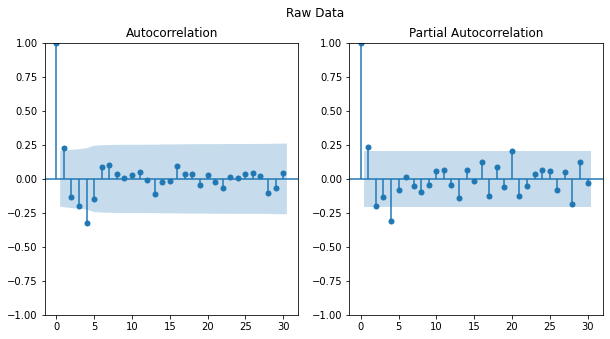

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(diff_train_data.values.squeeze(), lags=30, ax=ax[0]);
sm.graphics.tsa.plot_pacf(diff_train_data.values.squeeze(), lags=30, ax=ax[1]);

In [33]:
result = adfuller(diff_train_data.values)
format(result[1], '.23f')

'0.00000000011223558276884'